# Chapter 3

This notebook contains the exercises for lecture 3.

In [1]:
library(tidyverse)
library(broom)
library(modelr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘modelr’

The following object is masked from ‘package:broom’:

    bootstrap



## Problem 1

Let's consider our iris-dataset from the first day. Do the following:

1. Group the data based on species.
2. Calculate mean and variance for all other columns (`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`) based on this grouping.
3. Store these values into `iris_stats`-dataframe.
4. Try to get the data back into the following tidy format (`Species` (e.g. `setosa`), `Statistic` (e.g. `mean`), `Feature` (e.g. `Sepal.Length`) and `mean` and `var` for the columns.


| |Species| 	Feature| 	mean 	|var|
|-|-|-|-|-|
|0| 	setosa 	|Petal.Length 	|1.464 	|0.030106|
|1| 	setosa 	|Petal.Width 	|0.244 	|0.011494|
|2| 	setosa 	|Sepal.Length 	|5.006 	|0.124249|
|3| 	setosa 	|Sepal.Width 	|3.418 	|0.145180|
|4| 	versicolor 	|Petal.Length 	|4.260 	|0.220816|
|5| 	versicolor 	|Petal.Width 	|1.326 	|0.039106|
|6| 	versicolor 	|Sepal.Length 	|5.936 	|0.266433|
|7| 	versicolor 	|Sepal.Width 	|2.770 	|0.098469|
|8| 	virginica 	|Petal.Length 	|5.552 	|0.304588|
|9| 	virginica 	|Petal.Width 	|2.026 	|0.075433|
|10| 	virginica 	|Sepal.Length 	|6.588 	|0.404343|
|11| 	virginica 	|Sepal.Width 	|2.974 	|0.104004|

Bonus:

- Create a function that does these operations for **all** similar datasets (all columns are used for calculations). You can try it on the `wdbc` dataset given below (group by 'Diagnosis').

Relevant API pages:

- [summarise_all](https://dplyr.tidyverse.org/reference/summarise_all.html)
- [pivot_longer](https://tidyr.tidyverse.org/reference/pivot_longer.html) (newer versions of Tidyverse)
- [gather](https://tidyr.tidyverse.org/reference/gather.html)
- [separate](https://tidyr.tidyverse.org/reference/separate.html)
- [str_replace](https://www.rdocumentation.org/packages/stringr/versions/1.4.0/topics/str_replace)
- [spread](https://tidyr.tidyverse.org/reference/spread.html)

In [2]:
load_iris <- function(iris_data_file) {
    iris_data <- read_csv(iris_data_file, col_names=c('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species')) %>%
        mutate(Species=str_remove(Species, 'Iris-')) %>%
        mutate(Species=as.factor(Species))
    return(iris_data)
}

iris_data <- load_iris('../data/iris.data')

load_wdbc <- function(wdbc_data_file) {
    wdbc_data <- read_csv(wdbc_data_file, col_names=FALSE) %>%
        select(-X1) %>%
        rename(Diagnosis=X2)
    return(wdbc_data)
}

wdbc_data <- load_wdbc('../data/wdbc.data')

Parsed with column specification:
cols(
  Sepal.Length = col_double(),
  Sepal.Width = col_double(),
  Petal.Length = col_double(),
  Petal.Width = col_double(),
  Species = col_character()
)
Parsed with column specification:
cols(
  .default = col_double(),
  X2 = col_character()
)
See spec(...) for full column specifications.


In [3]:
iris_stats <- iris_data %>%
    # Step 1
    group_by(Species) %>%
    # Step 2 & 3
    summarize_all(c(mean=mean,var=var))

# Step 4
iris_stats <- iris_stats %>%
    gather(-Species, key='Feature', value='Value') %>%
    extract(Feature, 'Statistic', regex='_(.*)', remove=FALSE) %>%
    mutate(Feature=str_replace(Feature, '_.*', '')) %>%
    spread(Statistic, Value)

iris_stats

Species,Feature,mean,var
setosa,Petal.Length,1.464,0.03010612
setosa,Petal.Width,0.244,0.01149388
setosa,Sepal.Length,5.006,0.12424898
setosa,Sepal.Width,3.418,0.14517959
versicolor,Petal.Length,4.260,0.22081633
versicolor,Petal.Width,1.326,0.03910612
versicolor,Sepal.Length,5.936,0.26643265
versicolor,Sepal.Width,2.770,0.09846939
virginica,Petal.Length,5.552,0.30458776
virginica,Petal.Width,2.026,0.07543265


Bonus:

In [4]:
get_statistics <- function(dataset, group_variable) {
    result_dataset <- dataset %>%
        group_by_at(c(group_variable)) %>%
        summarize_all(c(mean=mean,var=var))
    
    result_dataset <- result_dataset %>%
        group_by_at(c(group_variable)) %>%
        gather(-c(group_variable), key='Feature', value='Value') %>%
        extract(Feature, 'Statistic', regex='_(.*)', remove=FALSE) %>%
        mutate(Feature=str_replace(Feature, '_.*', '')) %>%
        spread(Statistic, Value)
    return(result_dataset)
}

get_statistics(wdbc_data, 'Diagnosis')

Diagnosis,Feature,mean,var
B,X10,2.571741e-02,2.530892e-04
B,X11,1.741860e-01,6.153753e-04
B,X12,6.286739e-02,4.552664e-05
B,X13,2.840824e-01,1.267192e-02
B,X14,1.220380e+00,3.471328e-01
B,X15,2.000321e+00,5.947019e-01
B,X16,2.113515e+01,7.820700e+01
B,X17,7.195902e-03,9.367331e-06
B,X18,2.143825e-02,2.673719e-04
B,X19,2.599674e-02,1.083610e-03


## Problem 2

1. Calculate correlation between:

 - `Sepal.Length` and `Sepal.Width`
 - `Petal.Length` and `Petal.Width`

   Do you think that there is a linear relation between these variables?

2. Do a linear plot between:

 - `Sepal.Length` and `Sepal.Width`
 - `Petal.Length` and `Petal.Width`

   Print coefficients,

3. Plot both datasets as separate scatterplots and plot linear fits on top of them.

Relevant API pages:

- [pandas.DataFrame.cor](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/cor)

In [5]:
# Step 1

iris_data %>%
    summarize(SepalCor=cor(Sepal.Width, Sepal.Length), PetalCor=cor(Petal.Width, Petal.Length))

SepalCor,PetalCor
-0.1093692,0.9627571


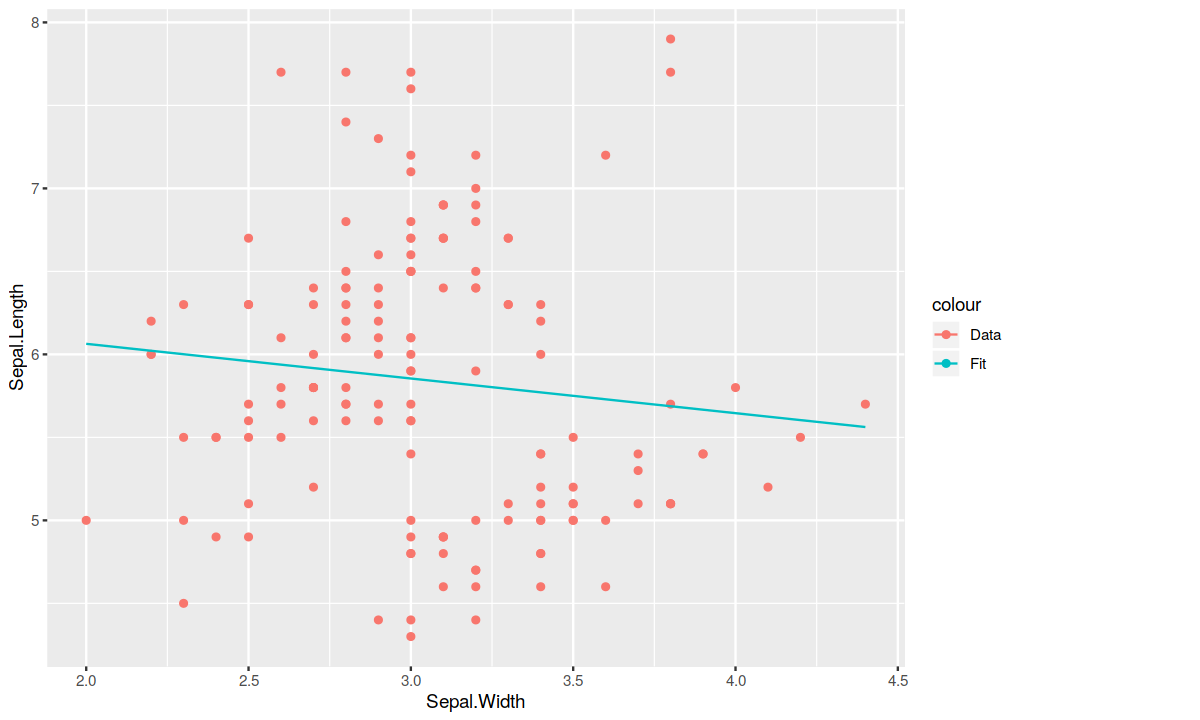

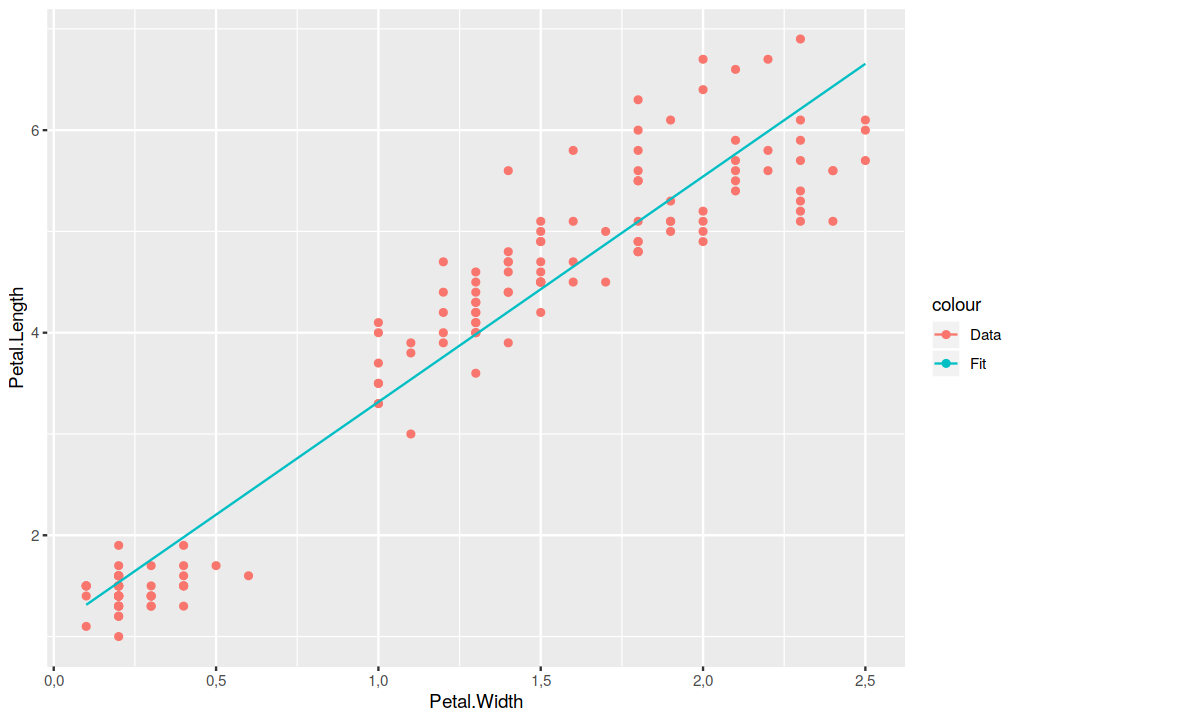

In [6]:
fit_linear <- function(dataset, x_column, y_column) {
    lm_formula <- as.formula(paste0(y_column, ' ~ ', x_column))
    lm_model <- lm(lm_formula, data=dataset)
    return(lm_model)
}

sepal_model <- fit_linear(iris_data, 'Sepal.Width', 'Sepal.Length')
petal_model <- fit_linear(iris_data, 'Petal.Width', 'Petal.Length')


iris_fitted <- iris_data %>%
    mutate(
        Sepal.Prediction=predict(sepal_model, data=.),
        Petal.Prediction=predict(petal_model, data=.),
    )

options(repr.plot.width=10, repr.plot.height=6)

iris_fitted %>%
    ggplot(aes(x=Sepal.Width, y=Sepal.Length, color='Data')) +
    geom_point() +
    geom_line(aes(x=Sepal.Width, y=Sepal.Prediction, color='Fit'))

iris_fitted %>%
    ggplot(aes(x=Petal.Width, y=Petal.Length, color='Data')) +
    geom_point() +
    geom_line(aes(x=Petal.Width, y=Petal.Prediction, color='Fit'))

## Problem 3

Use whatever means to calculate separate linear plots between

 - `Sepal.Length` and `Sepal.Width`
 - `Petal.Length` and `Petal.Width`
 
for all groups. Plot them in the same graph with different colors.

In [7]:
iris_fitdata <- iris_data %>%
    group_by(Species) %>%
    nest() %>%
    mutate(
        Petal.Model=map(data, function(x) fit_linear(x, 'Petal.Width', 'Petal.Length')),
        Sepal.Model=map(data, function(x) fit_linear(x, 'Sepal.Width', 'Sepal.Length')),
        data=map2(data, Petal.Model, function(x,y) add_predictions(x,y,var='Petal.Prediction')),
        data=map2(data, Sepal.Model, function(x,y) add_predictions(x,y,var='Sepal.Prediction')),
    )

glimpse(iris_fitdata)

Observations: 3
Variables: 4
$ Species     <fct> setosa, versicolor, virginica
$ data        <list> [<tbl_df[50 x 6]>, <tbl_df[50 x 6]>, <tbl_df[50 x 6]>]
$ Petal.Model <list> [<1,3430398, 0,4957386, -0,042187500, -0,042187500, -0,1…
$ Sepal.Model <list> [<2,6446597, 0,6908544, 0,037349940, 0,182777137, -0,155…


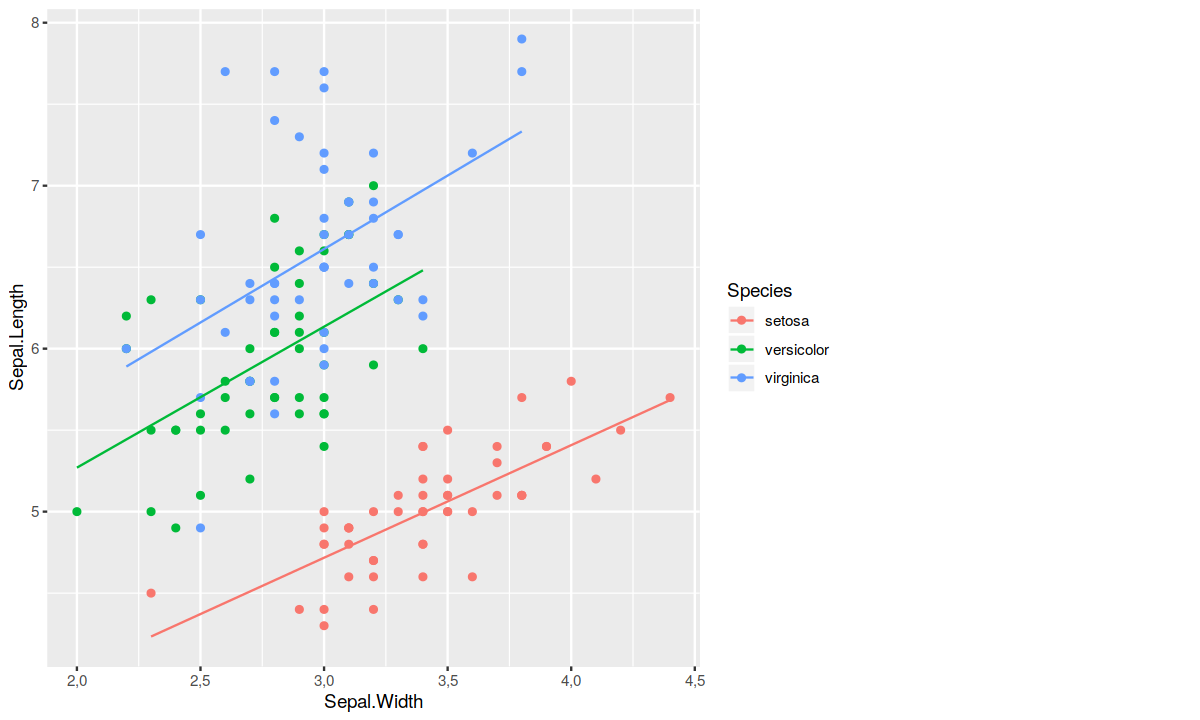

In [8]:
options(repr.plot.width=10, repr.plot.height=6)


iris_fitdata %>%
    select(Species,data) %>%
    group_by(Species) %>%
    unnest() %>%
    ggplot(aes(x=Sepal.Width, y=Sepal.Length, color=Species)) +
        geom_point() +
        geom_line(aes(y=Sepal.Prediction))

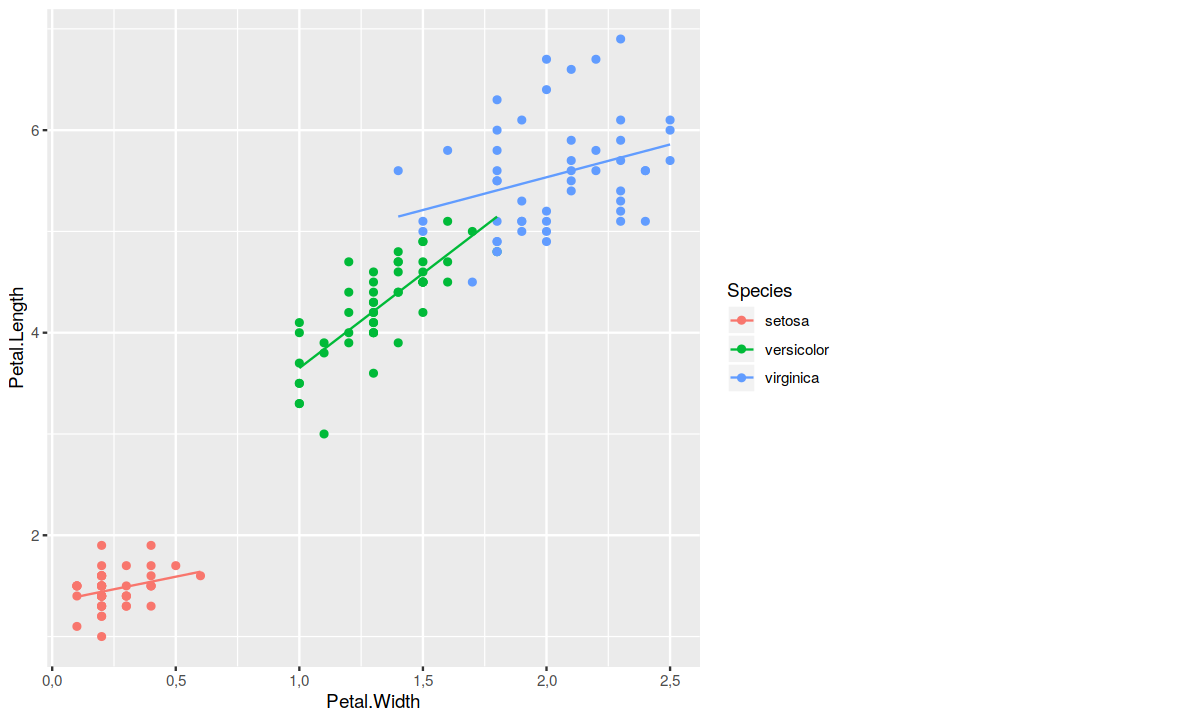

In [9]:
options(repr.plot.width=10, repr.plot.height=6)

iris_fitdata %>%
    select(Species,data) %>%
    group_by(Species) %>%
    unnest() %>%
    ggplot(aes(x=Petal.Width, y=Petal.Length, color=Species)) +
        geom_point() +
        geom_line(aes(y=Petal.Prediction))